In [4]:
#| default_exp MNIST

# Core Fuctions
> fastai를 이용해 MNIST로 영상 처리를 학습하는 방법입니다.

In [5]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
path.ls()

(#3) [Path('/Users/leejaewon/.fastai/data/mnist_sample/valid'),Path('/Users/leejaewon/.fastai/data/mnist_sample/labels.csv'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train')]

In [7]:
(path/'train').ls()

(#2) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/7'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10099.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10116.png'),Path('/Users/leejaewon/.fasta

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [12]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

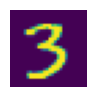

In [14]:
show_image(three_tensors[1])

In [15]:
#형변환
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [16]:
#속성의 길이 = 랭크
len(stacked_threes.shape)

3

In [17]:
#차원 = 길이가 3인 벡터? 랭크? 축의 크기? 축의 개수?
stacked_threes.ndim

3

<Axes: >

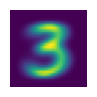

In [18]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

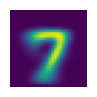

In [19]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

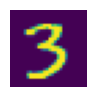

In [20]:
a_3 = stacked_threes[1]
show_image(a_3)

In [21]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
tns[1]

tensor([4, 5, 6])

In [24]:
tns[:,1]

tensor([2, 5])

In [25]:
tns[1,1:3]

tensor([5, 6])

In [26]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [27]:
tns.type()

'torch.LongTensor'

In [28]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [29]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [30]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [31]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [32]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [33]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [34]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float().mean())

accuracy_3s, accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# 확률적 경사 하강법 (SGD)

In [35]:
def pr_three(x,w): return (x*w).sum()

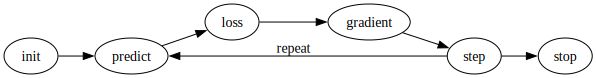

In [36]:
from fastbook import *

#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [37]:
def f(x): return x**2

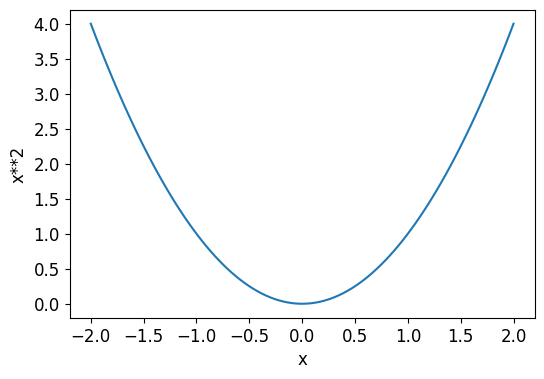

In [38]:
plot_function(f, 'x', 'x**2')

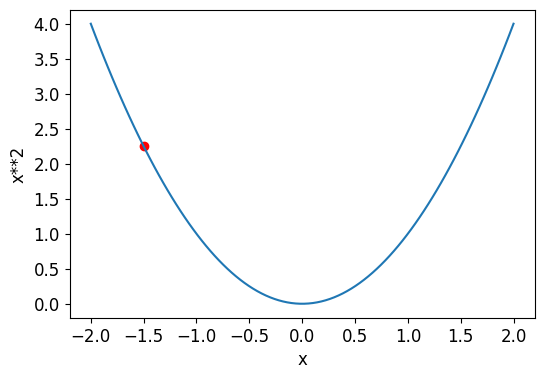

In [39]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [40]:
#특정 값의 변수에 대한 그레이디언트를 계산할 때 아래 과정으로 계산
#예시 1
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [41]:
#역전파
yt.backward()
xt.grad

tensor(6.)

In [42]:
#예시2
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [43]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [44]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

#학습률
w -= w.grad * lr

In [45]:
##SGD를 활용한 시작부터 끝까지 보여주는 예제
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

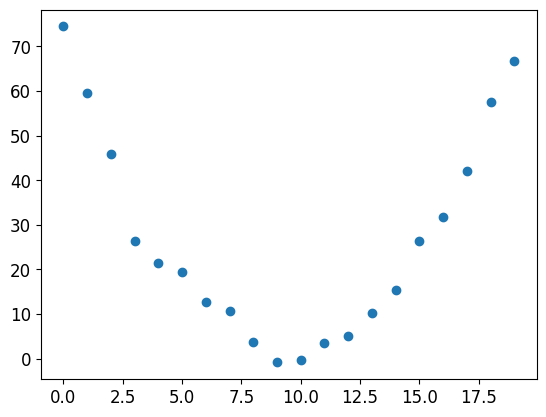

In [46]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [47]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [48]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [49]:
# 1단계: 파라미터 초기화
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [50]:
# 2단계: 예측 계산
preds = f(time,params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

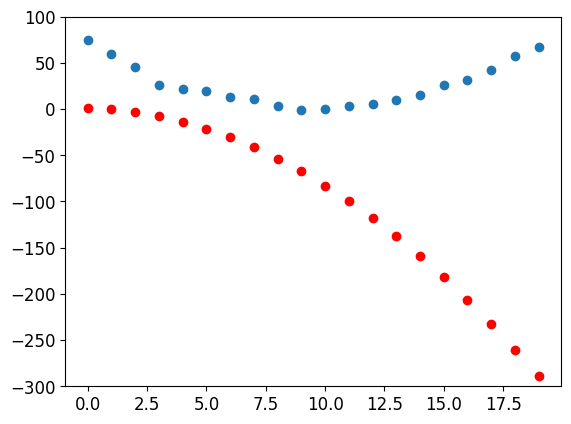

In [51]:
show_preds(preds)

In [52]:
# 3단계: 손실 계산
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [53]:
# 4단계: 그레디언트 계산
loss.backward()
params.grad

tensor([-53195.8594,  -3419.7146,   -253.8908])

In [54]:
params.grad*1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [55]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [56]:
# 5단계: 가중치를 한 단계 갱신하기
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [57]:
preds = f(time,params)
mse(preds,speed)

tensor(5435.5371, grad_fn=<MeanBackward0>)

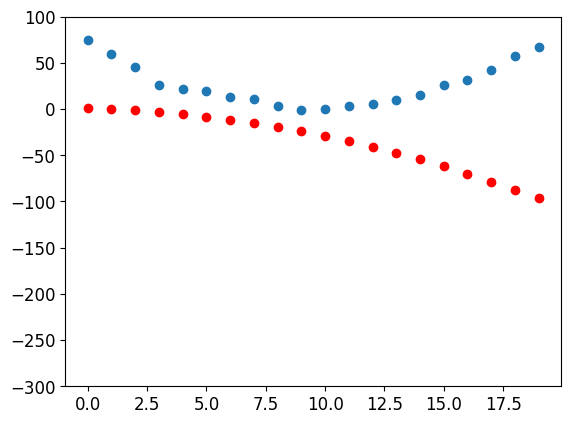

In [58]:
show_preds(preds)

In [59]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [60]:
# 6단계: 과정 반복하기
for i in range(10): apply_step(params)

5435.537109375
1577.449462890625
847.3779296875
709.2225952148438
683.0758056640625
678.1244506835938
677.1838989257812
677.0023193359375
676.9644775390625
676.9537353515625


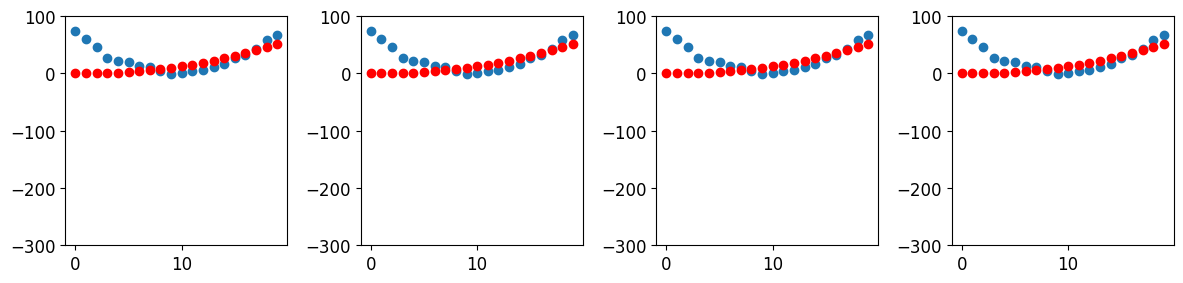

In [61]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [62]:
# 7단계: 학습 종료


# 4.5 MNIST 손실 함수


In [63]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [64]:
#크기가 1인 차원을 만든다
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [65]:
dset = list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [66]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [67]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))

In [68]:
bias = init_params(1)

In [69]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [70]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [71]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [72]:
corrects.float().mean().item()

0.49080348014831543

In [73]:
with torch.no_grad(): weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.5).float() == train_y).float().mean().item()

0.49080348014831543

In [74]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

torch.where(trgts==1, 1-prds,prds)

tensor([0.1000, 0.4000, 0.8000])

In [75]:
#DataLoader : 파이토치와 fastai에서 임의로 데이터셋을 뒤섞고 미니배치를 만듬
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [76]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [77]:
mnist_loss(tensor([0.9,0.4,0.8]),trgts)

tensor(0.2333)

In [78]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [79]:
#Dataset : 독립 변수와 종속변수 쌍을 다룸
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [80]:
#DataLoader로 Dataset을 넣어주면 독립변수와 종속변수 쌍을 표현한 텐서의 배치 목록을 얻을 수 있다
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [81]:
weights = init_params((28*28,1))
bias = init_params(1)

In [82]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [83]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [84]:
batch=train_x[:4]
batch.shape

torch.Size([4, 784])

In [85]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [86]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [87]:
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [88]:
#하나의 함수로
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [89]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [90]:
#loss.backwar는 지금 계산된 손실의 그레이디언트를 앞서 계산된 그레이디언트에 더하기 때문에 이전 그레이디언트를 0으로 설정해줘야 함.
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

###메서드 중 이름의 마지막에 밑줄이 포함된 것은 해당 객체를 제자리에서 조작

In [91]:
def train_epoch(model, lr, params):
    for xb, yb, in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [92]:
(preds>0.5).float()==train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [93]:

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [94]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [95]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [96]:
validate_epoch(linear1)

0.5264

In [97]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

In [98]:
#위 내용 반복
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9466 0.9505 0.9525 0.9559 0.9578 0.9598 0.9608 0.9613 0.9618 0.9633 0.9637 0.9647 0.9657 0.9672 0.9677 

In [99]:
#옵티마이저 만들기
#모듈 : 파이토치의 nn.Module 클래스를 상속받은 클래스 객체
#nn.linear는 init_params와 linear의 작동을 하나로 수행
linear_model = nn.Linear(28*28,1)

In [100]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [101]:
class BasicOptim:
    def __init__(self,params,lr): self.params, self.lr = list(params),lr
    def step(self, *args,**kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad=None

In [102]:
opt = BasicOptim(linear_model.parameters(), lr)

In [103]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [104]:
validate_epoch(linear_model)

0.4606

In [105]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [106]:
train_model(linear_model, 20)

0.4932 0.7686 0.8554 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.977 0.9775 0.9775 0.978 0.9785 

In [107]:
#SGD = BasicOptim
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4932 0.8179 0.8496 0.914 0.9346 0.9482 0.957 0.9619 0.9658 0.9673 0.9692 0.9712 0.9741 0.9751 0.9761 0.9775 0.9775 0.978 0.9785 0.979 

In [108]:
#tLearner.fit = train_model
#Dataloader = 트럭 한 대, Dataloaders = 운송회사
dls = DataLoaders(dl,valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [109]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


In [110]:
#복잡한 일을 다루려면 두 선형 분류 모델(계층) 사이에 비선형성을 추가해야 한다. => 신경망
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [111]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [114]:
# nn.ReLU = F.relu
# 파이토치는 nn.Sequential 사용 시 함수 대신 모듈을 사용하기를 요구함
# 모듈은 클래스 이므로 상기 코드의 nn.ReLU() 처럼 인스턴스를 만들어야 함.
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [116]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.321344,0.421972,0.504416,00:00
1,0.149697,0.234215,0.794897,00:00
2,0.081980,0.115639,0.915604,00:00
3,0.053492,0.077594,0.942100,00:00
4,0.040419,0.060471,0.957311,00:00
5,0.033799,0.050904,0.964181,00:00
6,0.030018,0.044883,0.965653,00:00
7,0.027572,0.040764,0.966634,00:00
8,0.025809,0.037766,0.968597,00:00
9,0.024443,0.035471,0.973013,00:00


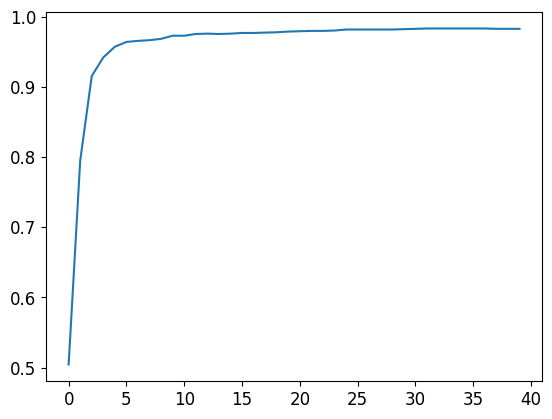

In [117]:
# itemgot은 튜플 목록에서 지정된 색인에 해당하는 튜플 요소만을 추출해
# 목록을 만들어줍니다
# 예를 들어 [(1,2,3), (4,5,6)].itemgot(2)는 [3,6]을 반환합니다
plt.plot(L(learn.recorder.values).itemgot(2));

In [118]:
learn.recorder.values[-1][2]

0.982826292514801

In [ ]:
# 딥러닝의 마법
# 1. 올바른 파라미터 집합이 주어지면 모든 문제를 원하는 정확도로 풀어낼 수 있는 함수(신경망)
# 2. 모든 함수에 대한 최적의 파라미터 집합을 찾아내는 방법(SGD)

In [119]:
#1장과 같은 방식을 사용하ㅚ, 18개 계층으로 구성된 모델을 학습시키는 상황
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.137623,0.028615,0.994603,00:26


In [112]:
#| export